<a href="https://colab.research.google.com/github/shahabas9/Deep_learning_basics/blob/main/cnn_catvsdog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!mkdir -p ~/ .kaggle


In [5]:
!ls -a

.  ..  .config	.kaggle  kaggle.json  sample_data


In [7]:
!chmod 600 /content/kaggle.json

In [8]:
!cp /content/kaggle.json  /root/.kaggle/

In [9]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:50<00:00, 23.4MB/s]
100% 1.06G/1.06G [00:50<00:00, 22.6MB/s]


In [10]:
import zipfile

In [11]:
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [16]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,MaxPooling2D,Flatten,Conv2D

In [22]:
train_ds=keras.utils.image_dataset_from_directory(directory="/content/train/",batch_size=32,image_size=(256,256),labels="inferred",label_mode="int")
validation_ds=keras.utils.image_dataset_from_directory(directory="/content/test",batch_size=32,image_size=(256,256),labels="inferred",label_mode="int")

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [24]:
def process(image,label):
  tf.cast(image/255,tf.float32)
  return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [17]:
model=Sequential()

In [18]:
# first convulation layer
model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation="relu",input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid")) # maxpooling layer

# second convulation layer
model.add(Conv2D(64,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

# third convolution layer
model.add(Conv2D(128,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Flatten()) #  flattening the layer
model.add(Dense(128,activation="relu")) #  first nueral network
model.add(Dense(64,activation="relu")) # second neural network
model.add(Dense(1,activation="sigmoid")) # binary classification and output

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [20]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [39]:
model.fit(train_ds,epochs=5,validation_data=validation_ds,verbose=True)

Epoch 1/5
625/625 [==============================] - 52s 83ms/step - loss: 0.6675 - accuracy: 0.5785 - val_loss: 0.7301 - val_accuracy: 0.5522
Epoch 2/5
625/625 [==============================] - 51s 81ms/step - loss: 0.6272 - accuracy: 0.6201 - val_loss: 0.8069 - val_accuracy: 0.5420
Epoch 3/5
625/625 [==============================] - 55s 87ms/step - loss: 0.5464 - accuracy: 0.6799 - val_loss: 0.9034 - val_accuracy: 0.5428
Epoch 4/5
625/625 [==============================] - 55s 88ms/step - loss: 0.4731 - accuracy: 0.7384 - val_loss: 1.3194 - val_accuracy: 0.5668
Epoch 5/5
625/625 [==============================] - 50s 78ms/step - loss: 0.4374 - accuracy: 0.7653 - val_loss: 1.3168 - val_accuracy: 0.5686


In [30]:
import cv2
import matplotlib.pyplot as plt

In [40]:
dog=cv2.imread("dog-puppy-on-garden-royalty-free-image-1586966191.jpg")

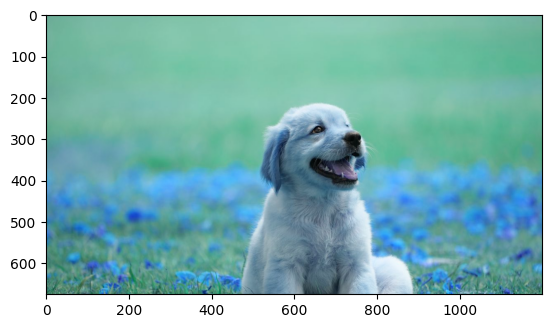

In [31]:
plt.imshow(dog)

In [32]:
dog.shape

(675, 1200, 3)

In [41]:
dog=cv2.resize(dog,(256,256))

In [42]:
dog=dog.reshape((1,256,256,3))

In [43]:
model.predict(dog)

1/1 [==============================] - 0s 23ms/step


array([[0.4808425]], dtype=float32)

1/1 [==============================] - 0s 18ms/step


array([[0.4808425]], dtype=float32)

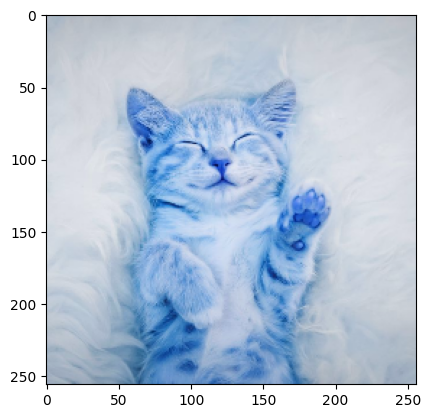

In [44]:
cat=cv2.imread("cute-cat-photos-1593441022.jpg")
cat=cv2.resize(cat,(256,256))
cat=cat.reshape((1,256,256,3))
model.predict(cat)

In [45]:
cat2=cv2.imread("images.jpeg")
cat2=cv2.resize(cat2,(256,256))
cat2=cat2.reshape((1,256,256,3))
model.predict(cat2)

1/1 [==============================] - 0s 21ms/step


array([[0.17364821]], dtype=float32)

In [46]:
dog2=cv2.imread("download.jpeg")
dog2=cv2.resize(dog2,(256,256))
dog2=dog2.reshape((1,256,256,3))
model.predict(dog2)

1/1 [==============================] - 0s 85ms/step


array([[0.1467948]], dtype=float32)